# Data Preparation


In [1]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...


KeyboardInterrupt: 

# Data Preprocessing

In [ ]:
# Extract the downloaded tar.gz files
import tarfile
for idx in range(1, 13):
    fn = 'images_%02d.tar.gz' % idx
    print('extracting '+fn+'...')
    with tarfile.open(fn, 'r:gz') as tar:
        tar.extractall('')  # extract the contents of the zip file


extracting images_01.tar.gz...


FileNotFoundError: [Errno 2] No such file or directory: 'images_01.tar.gz'

In [ ]:
# Get labels from the training, testing and validation CSV fields for training and validation datasets
import pandas as pd

# Load the CSV files
train_df = pd.read_csv('PruneCXR/miccai2023_nih-cxr-lt_labels_train.csv')
test_df = pd.read_csv('PruneCXR/miccai2023_nih-cxr-lt_labels_test.csv')
val_df = pd.read_csv('PruneCXR/miccai2023_nih-cxr-lt_labels_val.csv')

# Get disease label columns (exclude 'id' and 'subj_id')
columns = [col for col in train_df.columns if col not in ['subj_id']]
num_classes = len(columns)

# print(f"Train set loaded: {len(train_df)} samples")
# print(f"Test set loaded: {len(test_df)} samples")
# print(f"Validation set loaded: {len(val_df)} samples")
# print(f"Number of disease classes: {num_classes}")
# print(f"Disease classes: {label_columns}")

# get the labels and image id for each image
train_data = train_df[columns].values.tolist()
test_data = test_df[columns].values.tolist()
val_data = val_df[columns].values.tolist()

# change the binary labels to names and add image id
train_data = [(train_df['id'][i], [columns[j] for j in range(num_classes) if train_data[i][j] == 1]) for i in range(len(train_data))]
test_data = [(test_df['id'][i], [columns[j] for j in range(num_classes) if test_data[i][j] == 1]) for i in range(len(test_data))]
val_data = [(val_df['id'][i], [columns[j] for j in range(num_classes) if val_data[i][j] == 1]) for i in range(len(val_data))]

# print train_labels and image ids
print(f"Train labels: {train_data[:5]}")  # print first 5 labels
print(f"Test labels: {test_data[:5]}")    # print first 5 labels
print(f"Validation labels: {val_data[:5]}")  # print first 5 labels


Train labels: [('00000001_000.png', ['Cardiomegaly']), ('00000001_001.png', ['Cardiomegaly', 'Emphysema']), ('00000001_002.png', ['Cardiomegaly', 'Effusion']), ('00000002_000.png', ['No Finding']), ('00000004_000.png', ['Mass', 'Nodule'])]
Test labels: [('00000013_000.png', ['No Finding']), ('00000013_001.png', ['Emphysema', 'Pneumothorax', 'Subcutaneous Emphysema']), ('00000013_002.png', ['Emphysema', 'Pneumothorax', 'Subcutaneous Emphysema']), ('00000013_003.png', ['Pleural Thickening']), ('00000013_004.png', ['Effusion', 'Emphysema', 'Infiltration', 'Pneumothorax', 'Subcutaneous Emphysema'])]
Validation labels: [('00000003_000.png', ['Hernia']), ('00000003_001.png', ['Hernia']), ('00000003_002.png', ['Hernia']), ('00000003_003.png', ['Hernia', 'Infiltration']), ('00000003_004.png', ['Hernia'])]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..-1.8044444].


Train dataset size: 78506
Validation dataset size: 12533
Test dataset size: 21081
Number of classes: 20
Class names: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']
Image shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32, 20])


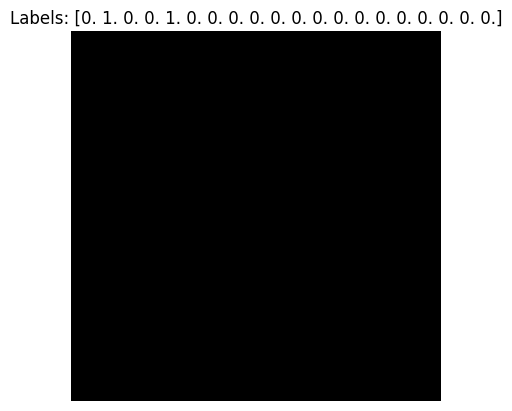

/var/folders/cb/_6k0kbyd0q303y_qn_1z14xh0000gn/T/ipykernel_83602/63309233.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(labels, dtype=torch.float32)


In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd
from PIL import Image
import os
from torchvision import transforms

class MultiHotCSVChestXrayDataset(Dataset):
    def __init__(self, csv_file, image_dir, class_names, transform=None):
        self.df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform
        self.class_names = class_names  # list of column names
        self.num_classes = len(class_names)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Load image
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row['id'])
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            # If image is unavailable, return a black image of the correct size
            image = Image.new('RGB', (224, 224), (0, 0, 0))

        # Get label tensor from class columns
        labels = row[self.class_names].values.astype(float)
        label_tensor = torch.tensor(labels, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, label_tensor

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create dataset instances
train_dataset = MultiHotCSVChestXrayDataset(
    csv_file="PruneCXR/miccai2023_nih-cxr-lt_labels_train.csv",
    image_dir="sample_dataset",
    class_names= [col for col in train_df.columns if col not in ['id', 'subj_id']],  # Exclude 'id' column
    transform=transform
)

val_dataset = MultiHotCSVChestXrayDataset(
    csv_file="PruneCXR/miccai2023_nih-cxr-lt_labels_val.csv",
    image_dir="sample_dataset",
    class_names= [col for col in val_df.columns if col not in ['id', 'subj_id']],  # Exclude 'id' column
    transform=transform
)

test_dataset = MultiHotCSVChestXrayDataset(
    csv_file="PruneCXR/miccai2023_nih-cxr-lt_labels_test.csv",
    image_dir="sample_dataset",
    class_names= [col for col in test_df.columns if col not in ['id', 'subj_id']],  # Exclude 'id' column
    transform=transform
)

# data loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# Print dataset sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Number of classes: {train_dataset.num_classes}")
print(f"Class names: {train_dataset.class_names}")


# shape of the first batch
image, labels = next(iter(train_loader))
print(f"Image shape: {image.shape}")
print(f"Labels shape: {labels.shape}")

# show 1st image and labels
import matplotlib.pyplot as plt
plt.imshow(image[29].permute(1, 2, 0).numpy())
plt.title(f"Labels: {labels[2].numpy()}")
plt.axis('off')
plt.show()

